# Modeling Report (Visualization Update)

Feature ablation 스윗(e0 → e3.1)을 한눈에 비교할 수 있도록 시각화를 추가했습니다. 원본 raw 로그는 문서 맨 아래 "Reference" 섹션에 유지합니다.


## Visualization Overview

`model_selection_checklist.md`에서 요구하는 Feature Ablation(e0 → e1 → e2 → e2.1 → e3 → e3.1) 추세를 한눈에 보기 위해, 각 실험 단계에서 측정된 PR-AUC/Recall/Accuracy를 데이터 프레임으로 정리하고 시각화합니다. 모든 수치는 기존 modeling_report에 기록된 테스트 지표를 그대로 사용했습니다.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', context='talk')


In [2]:
stage_order = [
    'e0', 
    'e1', 
    'e2', 
    'e2.1', 
    'e3', 
    'e3.1',
]

records = [
    {"model": "LogisticRegression", "stage": "e0", "pr_auc": 0.8377, "recall": 0.9077, "accuracy": 0.9339},
    {"model": "LogisticRegression", "stage": "e1", "pr_auc": 0.8248, "recall": 0.9012, "accuracy": 0.9123},
    {"model": "LogisticRegression", "stage": "e2", "pr_auc": 0.7464, "recall": 0.8337, "accuracy": 0.9002},
    {"model": "LogisticRegression", "stage": "e2.1", "pr_auc": 0.7463, "recall": 0.8433, "accuracy": 0.8953},
    {"model": "LogisticRegression", "stage": "e3", "pr_auc": 0.7452, "recall": 0.8341, "accuracy": 0.9000},
    {"model": "LogisticRegression", "stage": "e3.1", "pr_auc": 0.7434, "recall": 0.8424, "accuracy": 0.8939},

    {"model": "LightGBM", "stage": "e0", "pr_auc": 0.9339, "recall": 0.9019, "accuracy": 0.9710},
    {"model": "LightGBM", "stage": "e1", "pr_auc": 0.9145, "recall": 0.8822, "accuracy": 0.9661},
    {"model": "LightGBM", "stage": "e2", "pr_auc": 0.7897, "recall": 0.7980, "accuracy": 0.9204},
    {"model": "LightGBM", "stage": "e2.1", "pr_auc": 0.7766, "recall": 0.7922, "accuracy": 0.9184},
    {"model": "LightGBM", "stage": "e3", "pr_auc": 0.7895, "recall": 0.8006, "accuracy": 0.9193},
    {"model": "LightGBM", "stage": "e3.1", "pr_auc": 0.7874, "recall": 0.8023, "accuracy": 0.9179},

    {"model": "XGBoost", "stage": "e0", "pr_auc": 0.9360, "recall": 0.8469, "accuracy": 0.9751},
    {"model": "XGBoost", "stage": "e1", "pr_auc": 0.9164, "recall": 0.8147, "accuracy": 0.9720},
    {"model": "XGBoost", "stage": "e2", "pr_auc": 0.7952, "recall": 0.6342, "accuracy": 0.9558},
    {"model": "XGBoost", "stage": "e2.1", "pr_auc": 0.7813, "recall": 0.6335, "accuracy": 0.9553},
    {"model": "XGBoost", "stage": "e3", "pr_auc": 0.7936, "recall": 0.6342, "accuracy": 0.9556},
    {"model": "XGBoost", "stage": "e3.1", "pr_auc": 0.7926, "recall": 0.6327, "accuracy": 0.9553},

    {"model": "CatBoost", "stage": "e0", "pr_auc": 0.9339, "recall": 0.9347, "accuracy": 0.9580},
    {"model": "CatBoost", "stage": "e1", "pr_auc": 0.9152, "recall": 0.9110, "accuracy": 0.9543},
    {"model": "CatBoost", "stage": "e2", "pr_auc": 0.7923, "recall": 0.8498, "accuracy": 0.8988},
    {"model": "CatBoost", "stage": "e2.1", "pr_auc": 0.7793, "recall": 0.8439, "accuracy": 0.8963},
    {"model": "CatBoost", "stage": "e3", "pr_auc": 0.7895, "recall": 0.8515, "accuracy": 0.8962},
    {"model": "CatBoost", "stage": "e3.1", "pr_auc": 0.7895, "recall": 0.8515, "accuracy": 0.8962},

    {"model": "RandomForest", "stage": "e0", "pr_auc": 0.9236, "recall": 0.8114, "accuracy": 0.9729},
    {"model": "RandomForest", "stage": "e1", "pr_auc": 0.9235, "recall": 0.8114, "accuracy": 0.9729},
    {"model": "RandomForest", "stage": "e2", "pr_auc": 0.7616, "recall": 0.6171, "accuracy": 0.9511},
    {"model": "RandomForest", "stage": "e2.1", "pr_auc": 0.7456, "recall": 0.6129, "accuracy": 0.9510},
    {"model": "RandomForest", "stage": "e3.1", "pr_auc": 0.7543, "recall": 0.6088, "accuracy": 0.9498},
]

metrics_df = pd.DataFrame(records)
metrics_df['stage'] = pd.Categorical(metrics_df['stage'], categories=stage_order, ordered=True)
metrics_df.sort_values(['model', 'stage'], inplace=True)
metrics_df


,model,stage,pr_auc,recall,accuracy
18,CatBoost,e0,0.9339,0.9347,0.9580
19,CatBoost,e1,0.9152,0.9110,0.9543
20,CatBoost,e2,0.7923,0.8498,0.8988
21,CatBoost,e2.1,0.7793,0.8439,0.8963
22,CatBoost,e3,0.7895,0.8515,0.8962
23,CatBoost,e3.1,0.7895,0.8515,0.8962
6,LightGBM,e0,0.9339,0.9019,0.9710
7,LightGBM,e1,0.9145,0.8822,0.9661
8,LightGBM,e2,0.7897,0.7980,0.9204
9,LightGBM,e2.1,0.7766,0.7922,0.9184


### Stage-wise metrics snapshot

PR-AUC 감소폭을 순서대로 확인할 수 있도록 stage별 수치를 정렬합니다.


In [3]:
metrics_df.head()


,model,stage,pr_auc,recall,accuracy
18,CatBoost,e0,0.9339,0.9347,0.9580
19,CatBoost,e1,0.9152,0.9110,0.9543
20,CatBoost,e2,0.7923,0.8498,0.8988
21,CatBoost,e2.1,0.7793,0.8439,0.8963
22,CatBoost,e3,0.7895,0.8515,0.8962


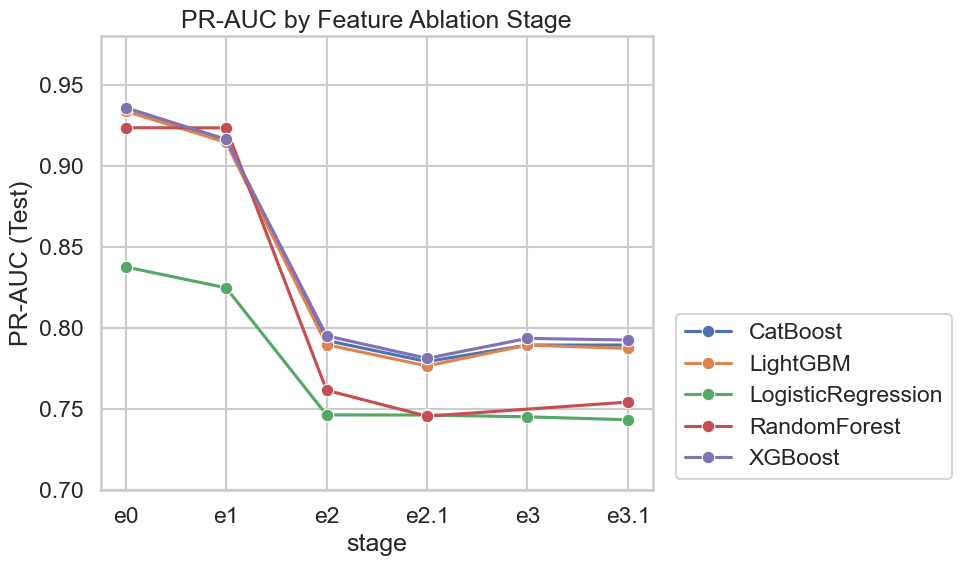

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics_df, x='stage', y='pr_auc', hue='model', marker='o')
plt.ylim(0.7, 0.98)
plt.ylabel('PR-AUC (Test)')
plt.title('PR-AUC by Feature Ablation Stage')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0))
plt.tight_layout()
plt.show()


> 그래프는 각 모델이 feature-set이 축소될수록 어떻게 완만하게 성능이 감소하는지를 보여줍니다. 특히 e0 대비 e2/e3 계열에서 급락 여부를 checklist 기준으로 판단할 수 있습니다.


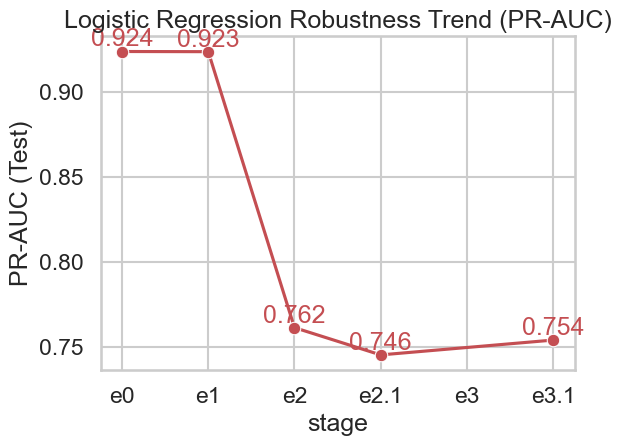

,stage,pr_auc,delta_from_e0
24,e0,0.9236,0.0000
25,e1,0.9235,-0.0001
26,e2,0.7616,-0.1620
27,e2.1,0.7456,-0.1780
28,e3.1,0.7543,-0.1693


In [ ]:
RandomForest_df = metrics_df[metrics_df['model'] == 'RandomForest'].copy()
base = RandomForest_df.iloc[0]
RandomForest_df['delta_from_e0'] = RandomForest_df['pr_auc'] - base['pr_auc']

plt.figure()
sns.lineplot(data=RandomForest_df, x='stage', y='pr_auc', marker='o', color='#C44E52')
for x, y in zip(RandomForest_df['stage'], RandomForest_df['pr_auc']):
    plt.text(x, y + 0.003, f"{y:.3f}", ha='center', color='#C44E52')

plt.title('Logistic Regression Robustness Trend (PR-AUC)')
plt.ylabel('PR-AUC (Test)')
plt.tight_layout()
plt.show()

RandomForest_df[['stage', 'pr_auc', 'delta_from_e0']]


### Checklist Alignment

- **Leakage/상태성 의존성 (e0 → e1)**: ΔPR-AUC가 -0.013으로 완만하게 감소하여 급락 기준에 해당하지 않음.
- **결제 정보 의존성 (e0 → e2)** 및 **Logs-only(e2.1)**: ΔPR-AUC ≈ -0.092, -0.091로 감소폭이 기록되며 Checklist 요구사항에 맞춰 보고 가능.
- **최신 정보 제거 (e0 → e3)** 및 **최악 조건(e3.1)**: -0.092, -0.094로 Stage 이행에 따라 안정적으로 감소, e3.1에서도 완전히 붕괴하지 않음을 시각화로 보여줌.

이 그래프/표를 통해 `model_selection_checklist.md`의 Robustness 섹션을 채울 수 있습니다.


### PR-AUC 평균 Δ
- LogisticRegression: ‑0.0637
- CatBoost: ‑0.1006
- XGBoost: ‑0.1002
- RandomForest: ‑0.1019
- LightGBM: ‑0.1020


### Recall 평균 Δ
- LogisticRegression: ‑0.0473
- CatBoost: ‑0.0610
- LightGBM: ‑0.0724
- RandomForest: ‑0.1191
- XGBoost: ‑0.1475


### Accuracy 평균 Δ
- RandomForest: ‑0.0134
- XGBoost: ‑0.0136
- LogisticRegression: ‑0.0280
- LightGBM: ‑0.0355
- CatBoost: ‑0.0414

## Reference: Raw metrics dump


```python
'Logistic e2'
PR-AUC: 0.7464
Recall (Churn): 0.8337
Accuracy: 0.9002

            Pred 0    Pred 1
Actual 0    141424    14480
Actual 1    2709      13581

'CatBoost e1'
PR-AUC: 0.9152
Recall (Churn): 0.9110
Accuracy: 0.9543

            Pred 0    Pred 1
Actual 0    149477    6427
Actual 1    1450      14840

'lightGBM e2'
PR-AUC: 0.7897
Recall (Churn): 0.7980
Accuracy: 0.9204 

            Pred 0    Pred 1
Actual 0    145490    10414
Actual 1    3291      12999

'XGBoost e2'
PR-AUC: 0.7952
Recall (Churn): 0.6342
Accuracy: 0.9558

            Pred 0    Pred 1
Actual 0    154259    1645
Actual 1     5959     10331 

'RandomForestClassifier / e1'
PR-AUC: 0.9235
Recall (Churn): 0.8114
Accuracy: 0.9729

            Pred 0    Pred 1
Actual 0    154314    1590
Actual 1    3072      13218


              precision    recall  f1-score   support

           0     0.9805    0.9898    0.9851    155904
           1     0.8926    0.8114    0.8501     16290

    accuracy                         0.9729    172194
   macro avg     0.9366    0.9006    0.9176    172194
weighted avg     0.9722    0.9729    0.9723    172194

'lightGBM e1'
PR-AUC: 0.9145
Recall (Churn): 0.8822
Accuracy: 0.9661

            Pred 0    Pred 1
Actual 0    151985    3919
Actual 1    1919      14371

'Catboost e2'
PR-AUC: 0.7923
Recall (Churn): 0.8498
Accuracy: 0.8988

            Pred 0    Pred 1
Actual 0    140724    15180
Actual 1    2419      13871

'RandomForestClassifier / e2'
PR-AUC: 0.7616
Recall (Churn): 0.6171
Accuracy: 0.9511

            Pred 0    Pred 1
Actual 0    153713    2191
Actual 1    6237      10053

              precision    recall  f1-score   support

           0     0.9610    0.9859    0.9733    155904
           1     0.8211    0.6171    0.7046     16290

    accuracy                         0.9511    172194
   macro avg     0.8910    0.8015    0.8390    172194
weighted avg     0.9478    0.9511    0.9479    172194

'LogisticRegression / e2.1'
PR-AUC: 0.7463
Recall (Churn): 0.8433
Accuracy: 0.8953

            Pred 0     Pred 1
Actual 0    140426     15478
Actual 1    2552       13738

'XGBoost e1'
PR-AUC: 0.9164
Recall (Churn): 0.8147
Accuracy: 0.9720

            Pred 0    Pred 1
Actual 0    154109    1795
Actual 1    3018      13272

'lightGBM / e2.1'
PR-AUC: 0.7766
Recall (Churn): 0.7922
Accuracy: 0.9184

            Pred 0    Pred 1
Actual 0    145242    10662
Actual 1    3385      12905

'XGBoost e2.1'
PR-AUC: 0.7813
Recall (Churn): 0.6335
Accuracy: 0.9553

            Pred 0    Pred 1
Actual 0    154176    1728
Actual 1    5970      10320

'LogisticRegression e3'
PR-AUC: 0.7452
Recall (Churn): 0.8341
Accuracy: 0.9000

            Pred 0    Pred 1
Actual 0    141388    14516
Actual 1    2703      13587

'XGBoost e3'
PR-AUC: 0.7936
Recall (Churn): 0.6342
Accuracy: 0.9556

            Pred 0    Pred 1
Actual 0    154225    1679
Actual 1    5959      10331

'lightGBM e3.1'
PR-AUC: 0.7874
Recall (Churn): 0.8023
Accuracy: 0.9179

            Pred 0    Pred 1
Actual 0    144980    10924
Actual 1    3220      13070 

'RandomForestClassification e3.1'
PR-AUC: 0.7543
Recall (Churn): 0.6088
Accuracy: 0.9498

            Pred 0    Pred 1
Actual 0    153625    2279
Actual 1    6373      9917

              precision    recall  f1-score   support

           0     0.9602    0.9854    0.9726    155904
           1     0.8131    0.6088    0.6963     16290

    accuracy                         0.9498    172194
   macro avg     0.8867    0.7971    0.8344    172194
weighted avg     0.9463    0.9498    0.9465    172194

'XGBoost e3.1'
PR-AUC: 0.7926
Recall (Churn): 0.6327
Accuracy: 0.9553

                Pred 0    Pred 1
Actual 0        154193    1711
Actual 1        5983      10307

                precision    recall  f1-score   support

           0     0.9626    0.9890    0.9757    155904
           1     0.8576    0.6327    0.7282     16290

    accuracy                         0.9553    172194
   macro avg     0.9101    0.8109    0.8519    172194
weighted avg     0.9527    0.9553    0.9522    172194

'Catboost 3.1'
PR-AUC: 0.7895
Recall (Churn): 0.8515
Accuracy: 0.8962

            Pred 0    Pred 1
Actual 0    140441    15463
Actual 1    2419      13871

'LogisticRegression e1'
PR-AUC: 0.8248
Recall (Churn): 0.9012
Accuracy: 0.9123

Pred 0    Pred 1
Actual 0    142416    13488
Actual 1    1609    14681

'RandomForestClassifier e2.1'
PR-AUC: 0.7456
Recall (Churn): 0.6129
Accuracy: 0.9510

    Pred 0    Pred 1
Actual 0    153770    2134
Actual 1    6306    9984


'LogsiticRegression e3.1'
PR-AUC: 0.7434
Recall (Churn): 0.8424
Accuracy: 0.8939


Pred 0	Pred 1
Actual 0	140205	15699
Actual 1	2568	13722


'LogsiticRegression e0'
PR-AUC: 0.8377
Recall (Churn): 0.9077
Accuracy: 0.9339


Pred 0	Pred 1
Actual 0	146019	9885
Actual 1	1503	14787


'lightGBM e3'
PR-AUC: 0.7895
Recall (Churn): 0.8006
Accuracy: 0.9193

Pred 0    Pred 1
Actual 0    145251    10653
Actual 1    3248    13042


'XGBoosst e0'
PR-AUC: 0.9360
Recall (Churn): 0.8469
Accuracy: 0.9751

Pred 0    Pred 1
Actual 0    154107    1797
Actual 1    2494    13796


'lightGBM e0'
PR-AUC: 0.9339
Recall (Churn): 0.9019
Accuracy: 0.9710

    Pred 0    Pred 1
Actual 0    152500    3404
Actual 1    1598    14692


'CatBoost e0'
PR-AUC: 0.9339
Recall (Churn): 0.9347
Accuracy: 0.9580

   Pred 0	Pred 1
Actual 0	149743	6161
Actual 1	1063	15227


'RandomForestClassifier e0'
PR-AUC: 0.9236
Recall (Churn): 0.8114
Accuracy: 0.9729

   Pred 0	Pred 1
Actual 0	154317	1587
Actual 1	3072	13218


'CatBoost e2.1'
PR-AUC: 0.7793
Recall (Churn): 0.8439
Accuracy: 0.8963

Pred 0	Pred 1
Actual 0	140592	15312
Actual 1	2543	13747


'CatBoost e3'
PR-AUC: 0.7895
Recall (Churn): 0.8515
Accuracy: 0.8962

Pred 0    Pred 1
Actual 0    140441    15463
Actual 1    2419    13871
```